# **AI Art Detector** | Inference
`Raden Dissa Shafira `

In this file, a trial of an ANN model will be conducted using the created inference data as an experiment. This file is a continuation of the main file in the same [repository](https://github.com/dissashaf/ai-or-not).

### Import and Load

In [11]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import load_model

from google.colab import files # for uploads
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load model
model_ai = load_model('model_sequential_ai.h5')

### Uploading File and Predicting

In [15]:
def predict_art():
    '''
    This function will call for an input (file)
    Compatible files are in jpg, jpeg, png, or other image type
    Prediction results will come in a couple of seconds
    '''
    uploaded = files.upload() # upload using google colab
    for i in uploaded.keys():
    
        path = i
        img =  tf.keras.utils.load_img(path, target_size=(128,128)) # resize to models train size
        plt.imshow(img) # show uploaded images
        plt.axis('Off')
        plt.show()

        x = tf.keras.utils.img_to_array(img) #change to array
        x = np.expand_dims(x, axis=0) 

        images = np.vstack([x])
        classes = model_ai.predict(images) # predict
        print(classes) 
        result_pred = tf.where(classes < 0.7, 0, 1)
        if result_pred == 1:
            print('Likely to be AI art')
        else:
            print('Likely to be man-made')

Saving my drawing to my drawing (1)


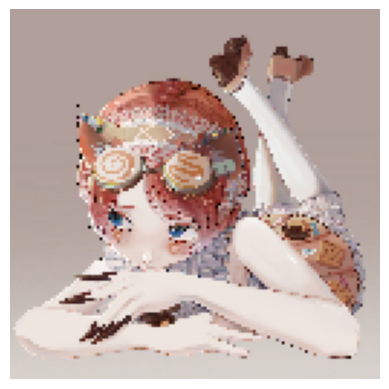

1/1 [==============================] - 0s 56ms/step
[[0.00179171]]
Likely to be man-made


In [20]:
# call function
predict_art()

We used our own drawing as the inference data. For this exact data, the model succeed in predicting it right. Although, the model still got some weaknesses, especially for detecting advanced AI-generated art and digitally made "man-made" art. For more information about the model's evaluation and weaknesses, please refer to the main notebook file.